<div dir=ltr align=center>In the name of God</div>
<br>
<font size=6><div dir=ltr align=center>
<font size=5>
Intelligent Analysis of
Biomedical Images
<br>
<font size=4>
sharif university of technology, CE department
</font>
<br>
<br>
<font size=6>
Homework 1.1
</font><br>
<font size=4>
Classic methods
</font>

**First-Name:* Mohammad Hossein

**Last-Name:** Sameti

**Student-Id:** 401204932

## Imoports and installs

In [4]:
!pip install pydicom

In [5]:
import numpy as np
from pydicom import dcmread
import matplotlib.pyplot as plt
import cv2

## load and work with DICOM (5)

complete the function `load_I` it should recive the file name and load the provided DICOM file, print its content and return the image in it.

In [6]:
def load_I(name):
  dc = dcmread(name)
  print(dc)
  return dc.pixel_array
I=load_I("img.dcm")

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 212
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.1055.1.20111103112244831.30826609.78057758
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.1055.1
(0002, 0013) Implementation Version Name         SH: 'dicomlibrary-100'
(0002, 0016) Source Application Entity Title     AE: 'DICOMLIBRARY'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 182
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'SECONDARY', 'OTHER', 'ARC', 'DICOM', 'VALIDATION']
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.1055

The cell below, adds some noise to the original image, don't change this code and run the cell.

## Deniosing (25)

In last section we added some noise to the original image, now you are expected to denoise the noisy image using two diffrent approaches.
1. for the first method you should implement a frequency filter for denoising (low pass filter)
2. for the second method with respect to the nature of the noise we added, you are expected to choose a spatial filter that can reduce the noise. the result depends on the filter you choose and it is expexted that the spatial filter removes as much noise as possible.

you can visualize the denoised results at the end of this section to determine if your methods were succesfull.

then you should compare the results and choose the better denoised image.

### 1) denoising using frequency filters (15)
In this section you are expected to complete the function `low_pass`. function recieves niosy image `I`, converts it to frequncy domain using fourier transform, applys a low pass filter and converts it back to space domain and then returns the result (denoised image) `I_df`.

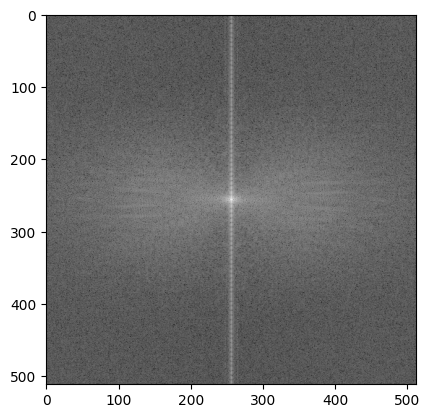

In [7]:
f = np.fft.fft2(I)
fs = np.fft.fftshift(f)
ms = 20*np.log(np.abs(fs) + 1e-6)
plt.imshow(ms, cmap='gray')

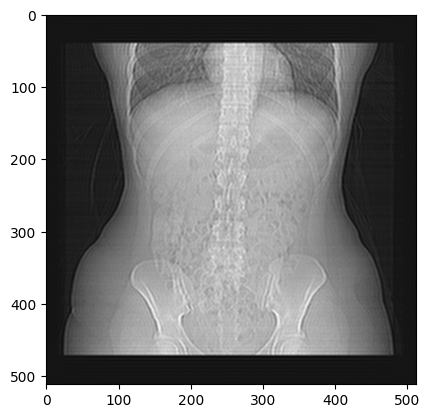

In [8]:
def low_pass(I, x_lim, y_lim):
  rows, cols = I.shape
  crow,ccol = rows/2 , cols/2
  crow = np.int32(crow)
  ccol = np.int32(ccol)
  f = np.fft.fft2(I)
  fshift = np.fft.fftshift(f)
  fshift[(crow-x_lim):(crow+x_lim+1), (ccol-y_lim):(ccol+y_lim+1)] = 0
  f_ishift = np.fft.ifftshift(fshift)
  img_back = np.fft.ifft2(f_ishift)
  img_back = np.real(img_back)

  return I - img_back


I_df=low_pass(I, 100, 100)
plt.imshow(I_df, cmap="gray")
plt.show()

### 2) denoising using spatial filters (5)

In this section you are expected to complete the function `denoise_spatial`. function recieves niosy image `I`, applies a spatial filter on it to denoise it and returns the denoised image `I_ds`.

In [9]:
from scipy import signal

In [10]:
def denoise_spatial(I):
  filter = np.array([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]]) / 273
  GF_im = signal.convolve2d(I, filter)
  return GF_im


I_ds=denoise_spatial(I)


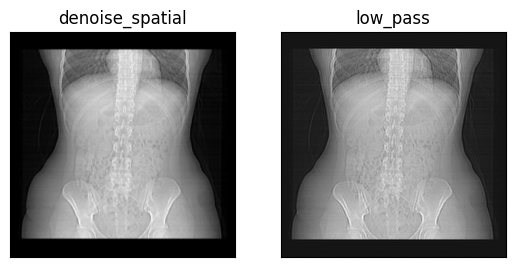

In [11]:
plt.subplot(121),plt.imshow(I_ds, cmap = 'gray')
plt.title('denoise_spatial'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_df, cmap = 'gray')
plt.title('low_pass'), plt.xticks([]), plt.yticks([])
plt.show()

### Question (5)

wich denoising method performed better? how is it related to the type and nature of the noise?

assign your chosen result of denoising to `I` for next section.

In [12]:
#I=I_ds
#I=I_df

## Global Sharpening (15)

Denoising images usualy result in less detailed blury images, therfore it is desirable to sharpen the denoised image.
for this means we have to amplify image details by first extracting them and then adding them to the image.

in this section you are expected to sharpen the image as described, once by using high pass filter and once by a spatial filter that can extract details (like edge detection filters).

### 1) sharpening using high pass filter (10)
complete the function `high_pass`.it recives image `I` converts it to frequncy domain using fourier transform, applies a high pass filter and converts it back to space domain and then returns the result (details of the image) `detail_I`.

hint: you can use the low pass filter you implemented earlier.

In [13]:
def high_pass(I):
  return I - low_pass(I, 100, 100)

detail_I = high_pass(I)
I_sharp_hi=I+detail_I

### 2) sharpening using a spatial filter (5)
complete the function `detail_spatial`.it recives image `I` applies a spatial filter on it that can extract image details and returns the result (details of the image) `detail_I`.

hint: search for edge detection spatial filters.

In [14]:
def detail_spatial(I):
  filter = np.array([[1,1,1],[1,8,1],[1,1,1]])
  GF_im = signal.convolve2d(I, filter)
  return GF_im

detail_I = detail_spatial(I)
I_sharp_spatial=I+detail_I[:512, :512]

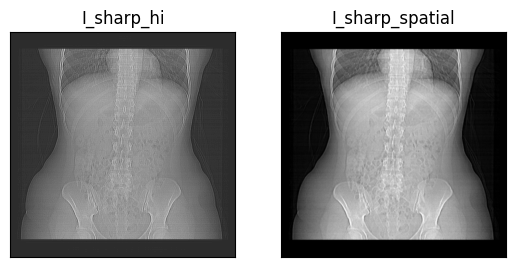

In [15]:
plt.subplot(121),plt.imshow(I_sharp_hi, cmap = 'gray')
plt.title('I_sharp_hi'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_sharp_spatial, cmap = 'gray')
plt.title('I_sharp_spatial'), plt.xticks([]), plt.yticks([])
plt.show()

## Multi-scale image enhancement (40)

In this section you are expected to implement multi-scale image enhancement. You should build pyramid of detail with your preferd enhancment method (you can use the high pass filter you implemented) and add it to the original image level by level.

complete the function `multi_enhance`. it recives the image `I` performs the explained enhancment and returns the result.

you can write other functions as needed to be called in the `multi_enhance` function.

In [30]:
def gray_enhance(I):
   return(np.tanh(I/16) * max(np.max(I), np.abs(np.min(I))))

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 212
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.1055.1.20111103112244831.30826609.78057758
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.1055.1
(0002, 0013) Implementation Version Name         SH: 'dicomlibrary-100'
(0002, 0016) Source Application Entity Title     AE: 'DICOMLIBRARY'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 182
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'SECONDARY', 'OTHER', 'ARC', 'DICOM', 'VALIDATION']
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.1055

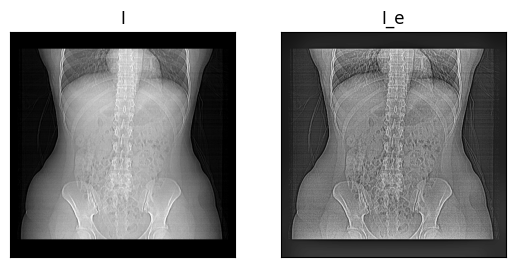

In [34]:
def Image_pyramid(I, n_level):
  lst = []
  I = np.float32(I)
  for i in range(n_level):
    I_d = cv2.pyrDown(I)
    D = I - cv2.pyrUp(I_d)
    lst.append(D)
    I = I_d

  lst.append(I)
  return lst

def multi_enhance(I, n_level):
  lst = Image_pyramid(I, n_level)

  for i in range(len(lst)):
    lst[i] = gray_enhance(lst[i])

  enhanced_im = lst[-1]
  for i in range(n_level-1, -1, -1):

    enhanced_im = cv2.pyrUp(enhanced_im) + lst[i]

  return I + enhanced_im

I = load_I("img.dcm")
I_e = multi_enhance(I, 5)

plt.subplot(121),plt.imshow(I, cmap = 'gray')
plt.title('I'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_e, cmap = 'gray')
plt.title('I_e'), plt.xticks([]), plt.yticks([])
plt.show()

#I=I_e


## Gray level enhancment (15)

using gray level enhancment try to enhance the contrast of last sections result.
you have to complete the function `gray_enhance` it recives an image `I` and returns the enhanced image `I_c`

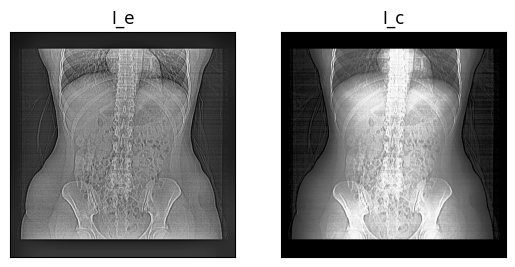

In [26]:
import copy

def gray_enhance(I):

  return cv2.equalizeHist(I)
I_c=gray_enhance(I)
plt.subplot(121),plt.imshow(I_e, cmap = 'gray')
plt.title('I_e'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_c, cmap = 'gray')
plt.title('I_c'), plt.xticks([]), plt.yticks([])
plt.show()